<a href="https://colab.research.google.com/github/cindy-purity/Data-Science-Projects/blob/main/starwars_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [44]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('/content/StarWars.csv', encoding = 'ISO-8859-1')

Explore the data

In [6]:
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


View the columns in the dataset

In [8]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [11]:
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Have you seen any of the 6 films in the Star Wars franchise?
Yes         936
No          250
Response      1
Name: count, dtype: int64

In [12]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes         552
NaN         350
No          284
Response      1
Name: count, dtype: int64

We will convert the next few columns from Yes/No to True/False to make it easier to work with.

In [53]:
#Map Yes/No columns to Boolean values to standardize the data
yes_no = {"Yes": True, "No": False}

In [54]:
df['Have you seen any of the 6 films in the Star Wars franchise?'] = df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
df

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3.292731e+09,NaN,NaN,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,NaN,NaN,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
16,3.292583e+09,NaN,NaN,True,True,True,True,True,True,4,...,Somewhat favorably,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
23,3.292512e+09,NaN,NaN,True,True,True,True,True,True,6,...,Very favorably,Greedo,Yes,Yes,Yes,Male,18-29,"$50,000 - $99,999",Bachelor degree,South Atlantic
27,3.292420e+09,NaN,NaN,True,True,True,True,True,True,4,...,Very favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,3.288485e+09,NaN,NaN,True,True,True,True,True,True,3,...,Very favorably,Greedo,Yes,Yes,Yes,Male,45-60,"$100,000 - $149,999",Graduate degree,West South Central
1129,3.288483e+09,NaN,NaN,True,True,True,True,True,True,4,...,Very favorably,Han,Yes,No,Yes,Female,18-29,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1153,3.288429e+09,NaN,NaN,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,Yes,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1172,3.288403e+09,NaN,NaN,True,True,True,True,True,True,6,...,Somewhat unfavorably,Han,Yes,Yes,Yes,Female,> 60,"$25,000 - $49,999",Bachelor degree,Mountain


Data Cleaning

In [41]:
#check if there is any missing values in the columns of the dataset
df.isnull().sum()

RespondentID                                                                                                                                     0.0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     0.0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            0.0
seen_1                                                                                                                                           0.0
seen_2                                                                                                                                           0.0
seen_3                                                                                                                                           0.0
seen_4                                                                                                    

In [46]:
#drop the missing values
df = df.dropna()

In [47]:
#Convert checkbox columns to lists and get them into a consistent format
df['Which of the following Star Wars films have you seen? Please select all that apply.'].apply(lambda x: x.split(','))


5       [Star Wars: Episode I  The Phantom Menace]
6       [Star Wars: Episode I  The Phantom Menace]
16      [Star Wars: Episode I  The Phantom Menace]
23      [Star Wars: Episode I  The Phantom Menace]
27      [Star Wars: Episode I  The Phantom Menace]
                           ...                    
1128    [Star Wars: Episode I  The Phantom Menace]
1129    [Star Wars: Episode I  The Phantom Menace]
1153    [Star Wars: Episode I  The Phantom Menace]
1172    [Star Wars: Episode I  The Phantom Menace]
1176    [Star Wars: Episode I  The Phantom Menace]
Name: Which of the following Star Wars films have you seen? Please select all that apply., Length: 132, dtype: object

In [57]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# List of columns to be transformed
columns_to_transform = df.columns[3:9]

# Use replace method
df[columns_to_transform] = df[columns_to_transform].replace(movie_mapping)

Clean and rename the ranking columns to make them easier to analyze

In [58]:
#rename the ranking columns to make them easier to analyze
df= df.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                         "Unnamed: 4": "seen_2",
                         "Unnamed: 5": "seen_3",
                         "Unnamed: 6": "seen_4",
                         "Unnamed: 7": "seen_5",
                         "Unnamed: 8": "seen_6",})
df.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3.292731e+09,NaN,NaN,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,NaN,NaN,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
16,3.292583e+09,NaN,NaN,True,True,True,True,True,True,4,...,Somewhat favorably,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
23,3.292512e+09,NaN,NaN,True,True,True,True,True,True,6,...,Very favorably,Greedo,Yes,Yes,Yes,Male,18-29,"$50,000 - $99,999",Bachelor degree,South Atlantic


In [59]:
df = df.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3.292731e+09,NaN,NaN,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,NaN,NaN,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
16,3.292583e+09,NaN,NaN,True,True,True,True,True,True,4,...,Somewhat favorably,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
23,3.292512e+09,NaN,NaN,True,True,True,True,True,True,6,...,Very favorably,Greedo,Yes,Yes,Yes,Male,18-29,"$50,000 - $99,999",Bachelor degree,South Atlantic
27,3.292420e+09,NaN,NaN,True,True,True,True,True,True,4,...,Very favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic


<BarContainer object of 6 artists>

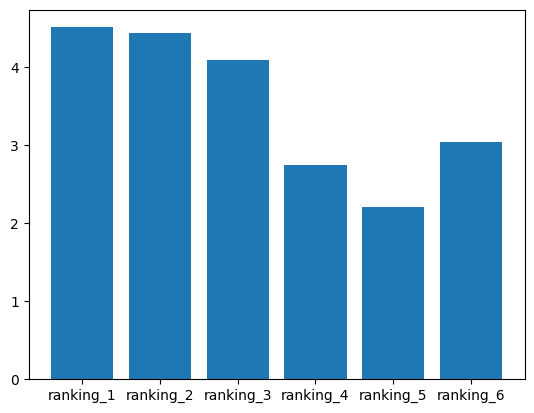

In [66]:
df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)
df[df.columns[9:15]].mean()
plt.bar(df[df.columns[9:15]].mean().index, df[df.columns[9:15]].mean())

Identify the highest-ranked and most-viewed Star Wars films

In [64]:
#Identify the highest-ranked Star Wars films
highest_ranked_film = df[df.columns[9:15]].mean().idxmax()
highest_ranked_film

'ranking_1'

In [65]:
#Identify the most-viewed Star Wars films
most_viewed_film = df[df.columns[3:9]].sum().idxmax()
most_viewed_film

'seen_1'

Analyze the data by key demographic segments like gender, age, and location

<BarContainer object of 2 artists>

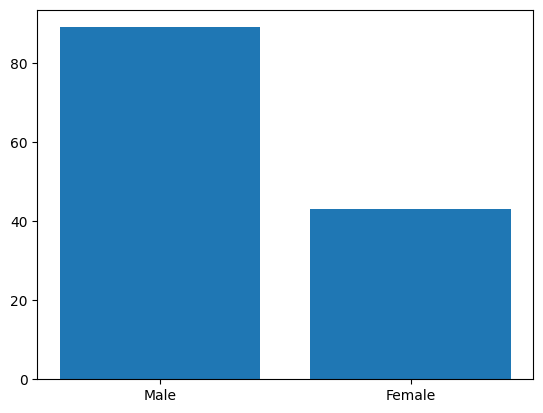

In [73]:
#Analyze the data by gender
gender_counts = df['Gender'].value_counts()
gender_counts
plt.bar(gender_counts.index, gender_counts)

Text(0.5, 1.0, 'Age Distribution')

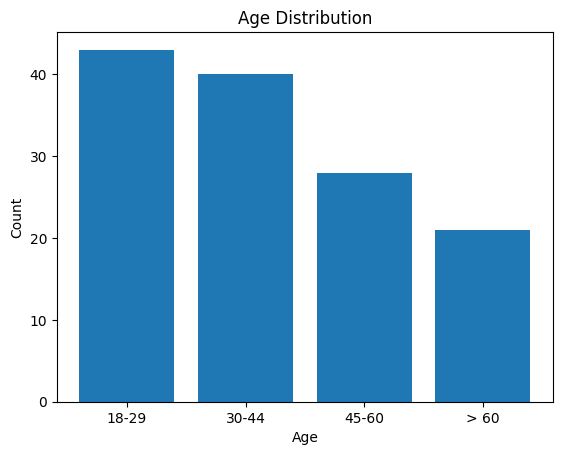

In [75]:
# Analyze data by age
age_counts = df['Age'].value_counts()
age_counts
plt.bar(age_counts.index, age_counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

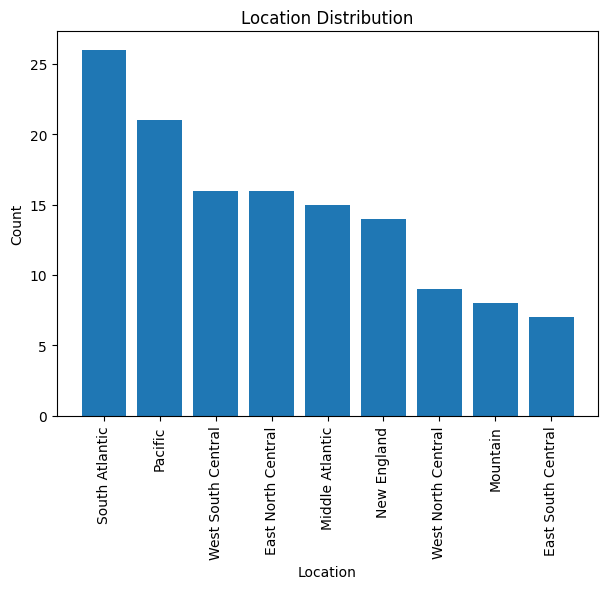

In [80]:
#Analyze data by location
location_counts = df['Location (Census Region)'].value_counts()
location_counts
plt.bar(location_counts.index, location_counts)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Summarize your findings on fan preferences and differences between groups

<BarContainer object of 2 artists>

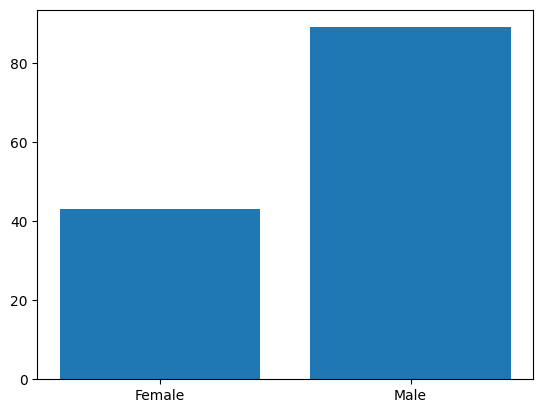

In [82]:
#between males and females who viewed the most viewed film
df.groupby('Gender')['seen_1'].sum()
plt.bar(df.groupby('Gender')['seen_1'].sum().index, df.groupby('Gender')['seen_1'].sum())